In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

data = pd.read_pickle(r'C:\Users\admin\Desktop\Γιάννης\Πτυχιακή\tov_data.pkl')
data.head()

,rho_c,p1,Gamma1,Gamma2,Gamma3,M,R
0,5.000000e+14,0.000044,3.005,2.988,2.851,0.584248,12.091649
1,6.000000e+14,0.000044,3.005,2.988,2.851,0.805697,11.929975
2,7.000000e+14,0.000044,3.005,2.988,2.851,1.024421,11.861241
3,8.000000e+14,0.000044,3.005,2.988,2.851,1.228045,11.792873
4,9.000000e+14,0.000044,3.005,2.988,2.851,1.409160,11.700242


In [ ]:
TargetVariable=['M','R']
Predictors=['rho_c']

X=data[Predictors].values
y=data[TargetVariable].values

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60, 1)
(60, 2)
(26, 1)
(26, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))

model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

model.add(Dense(2, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8997
Epoch 2/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8996
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8995
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8994
Epoch 5/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8993
Epoch 6/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8992
Epoch 7/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8990
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 0.8989
Epoch 9/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8986
Epoch 10/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8983
Epoch 11/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8980
Epoch 12/50
3/3 [==============================] - 0s 1ms/step - loss: 0.8976
Epoch 13/50
3/3 [==============================] - 0s 1ms/step - loss: 0.

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    batch_size_list=[3, 5, 10, 15]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            temp = pd.DataFrame({})
            
            TrialNumber+=1
            model = Sequential()
            
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
            
            model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

            model.add(Dense(2, kernel_initializer='normal'))

            model.compile(loss='mean_squared_error', optimizer='adam')

            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
            y_mod       = model.predict(X_test)
            y_mod_norm  = np.sqrt(y_mod.T[0]**2 + y_mod.T[1]**2)
            y_test_norm = np.sqrt(y_test.T[0]**2 + y_test.T[1]**2)
            
            MAPE = np.mean(100 * (np.abs(y_test_norm-y_mod_norm)/y_test_norm))
            
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            temp = pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )
            
            frames = [SearchResultsData,temp]
            
            SearchResultsData = pd.concat(frames, ignore_index = True)
    return(SearchResultsData)

ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 43ms/step
1 Parameters: batch_size: 3 - epochs: 5 Accuracy: 2.055600533966384
1/1 [==============================] - 0s 44ms/step
2 Parameters: batch_size: 3 - epochs: 10 Accuracy: 66.97707174624333
1/1 [==============================] - 0s 43ms/step
3 Parameters: batch_size: 3 - epochs: 50 Accuracy: 78.66690940969862
1/1 [==============================] - 0s 42ms/step
4 Parameters: batch_size: 3 - epochs: 100 Accuracy: 79.66177021146314
1/1 [==============================] - 0s 42ms/step
5 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8808504957928562
1/1 [==============================] - 0s 43ms/step
6 Parameters: batch_size: 5 - epochs: 10 Accuracy: 13.35048336862522
1/1 [==============================] - 0s 42ms/step
7 Parameters: batch_size: 5 - epochs: 50 Accuracy: 79.75512626651471
1/1 [==============================] - 0s 44ms/step
8 Parameters: batch_size: 5 - epochs: 100 Accuracy: 78.41596164095591
1/1 [==========================

<AxesSubplot:xlabel='Parameters'>

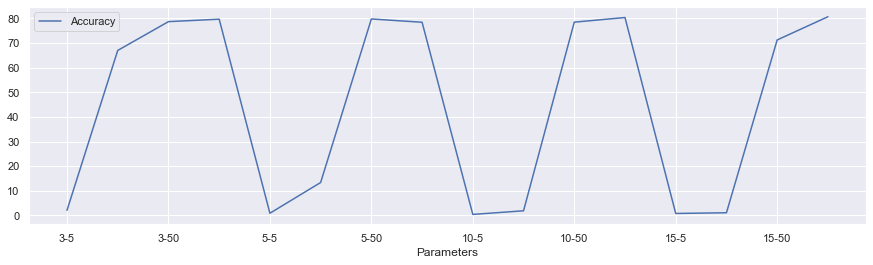

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
model.fit(X_train, y_train ,batch_size = 3, epochs = 100, verbose=0)

Predictions=model.predict(X_test)

Predictions=TargetVarScalerFit.inverse_transform(Predictions)

y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)

TestingData['M'] = y_test_orig.T[0]
TestingData['R'] = y_test_orig.T[1]

TestingData['M_pred'] = Predictions.T[0]
TestingData['R_pred'] = Predictions.T[1]

TestingData.head()

1/1 [==============================] - 0s 13ms/step


,rho_c,M,R,M_pred,R_pred
0,7.994713e+15,1.527880,7.489135,1.570724,7.516838
1,5.069138e+14,0.584248,12.091649,1.424340,12.062049
2,7.495526e+15,1.542688,7.496460,1.575440,7.528432
3,2.703335e+15,1.986147,9.111150,1.929218,9.180888
4,1.704962e+15,2.022984,10.454574,1.946657,10.094380


In [ ]:

Testing_norm   = np.sqrt(TestingData.M.values**2 + TestingData.R.values**2)
Predicted_norm = np.sqrt(TestingData.M_pred.values**2 + TestingData.R_pred.values**2)

APE=100*(abs(Testing_norm-Predicted_norm)/Testing_norm)
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 98.94085742459528


,rho_c,M,R,M_pred,R_pred,APE
0,7.994713e+15,1.527880,7.489135,1.570724,7.516838,0.468299
1,5.069138e+14,0.584248,12.091649,1.424340,12.062049,0.331233
2,7.495526e+15,1.542688,7.496460,1.575440,7.528432,0.495989
3,2.703335e+15,1.986147,9.111150,1.929218,9.180888,0.603512
4,1.704962e+15,2.022984,10.454574,1.946657,10.094380,3.457129


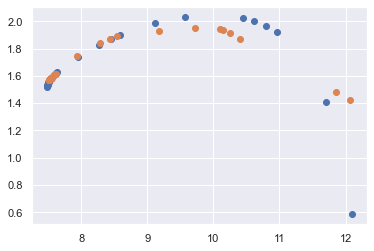

In [ ]:
import matplotlib.pyplot as plt
x1 = TestingData.R.values
y1 = TestingData.M.values

x2 = TestingData.R_pred.values
y2 = TestingData.M_pred.values

plt.scatter(x1,y1)
plt.scatter(x2,y2)

In [ ]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

X = np.array([np.linspace(min(data.rho_c), max(data.rho_c), 100),]).T

trial_df = pd.DataFrame({})

trial_df['rho_c'] = X.T[0]

PredictorScaler=StandardScaler()


PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

In [ ]:
Predictions=model.predict(X)

Predictions=TargetVarScalerFit.inverse_transform(Predictions)




trial_df['M_pred'] = Predictions.T[0]
trial_df['R_pred'] = Predictions.T[1]

trial_df.head()

4/4 [==============================] - 0s 667us/step


,rho_c,M_pred,R_pred
0,5.000000e+14,1.424218,12.062498
1,5.858586e+14,1.426645,12.053606
2,6.717172e+14,1.432272,12.032952
3,7.575758e+14,1.442464,11.995415
4,8.434343e+14,1.460552,11.928720


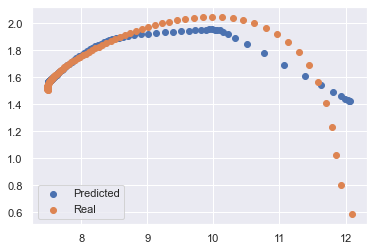

In [ ]:
x1 = trial_df.R_pred.values
y1 = trial_df.M_pred.values

x2 = data.R.values
y2 = data.M.values

plt.scatter(x1, y1, label = 'Predicted')
plt.scatter(x2, y2, label = 'Real')
plt.legend()